#  Day 1: Classification Basics + Dataset Setup

In [98]:
#download data from kaggle
!pip install opendatasets

In [99]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib

In [100]:
# imputing missing values in num_cols
from sklearn.impute import SimpleImputer
# scaling numeric value in 1-0 range
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
# Combine the numerical and categorical pipelines
from sklearn.compose import ColumnTransformer

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
od.download("https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?select=loan_data.csv")
#hemantk777  721b095dacb7cfa6129768282921b8fb

Skipping, found downloaded files in "./loan-approval-classification-data" (use force=True to force download)


In [103]:
df=pd.read_csv("/content/loan-approval-classification-data/loan_data.csv")

In [104]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [105]:
df.shape

(45000, 14)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [107]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [108]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [109]:
correlation=df.select_dtypes(include=['number']).corr()
correlation['loan_status']

,loan_status
person_age,-0.021476
person_income,-0.135808
person_emp_exp,-0.020481
loan_amnt,0.107714
loan_int_rate,0.332005
loan_percent_income,0.384880
cb_person_cred_hist_length,-0.014851
credit_score,-0.007647
loan_status,1.000000


In [110]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


#  Day 2: Model Training (Random Forest + XGBoost)

In [111]:
# Handle missing values (basic for now)
df.dropna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [112]:
# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

In [113]:
df.shape

(45000, 23)

In [114]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [115]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [116]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:57:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [117]:
def evaluate(y_test, y_pred, name):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xgb_preds, "XGBoost")




Random Forest Evaluation
Accuracy: 0.9285555555555556
Confusion Matrix:
 [[6821  179]
 [ 464 1536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


XGBoost Evaluation
Accuracy: 0.9354444444444444
Confusion Matrix:
 [[6787  213]
 [ 368 1632]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.88      0.82      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000



In [118]:
#Save the Best Model
##   joblib.dump(xgb, "xgb_model.pkl")

# Day 3: Handle Class Imbalance (Class Weights + SMOTE)

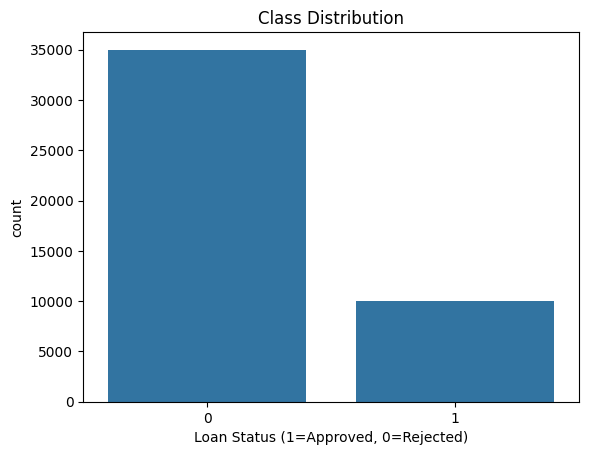

Value Counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64


In [119]:
# Visualize Imbalance
sns.countplot(x="loan_status", data=df)
plt.title("Class Distribution")
plt.xlabel("Loan Status (1=Approved, 0=Rejected)")
#plt.savefig("Class Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

print("Value Counts:\n", df["loan_status"].value_counts())


In [120]:
# Retrain with class_weight='balanced' (RandomForest)
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)
rfb_preds = rf_balanced.predict(X_test)

In [121]:
evaluate(y_test, rfb_preds, "Random Forest (Balanced)")


Random Forest (Balanced) Evaluation
Accuracy: 0.9275555555555556
Confusion Matrix:
 [[6834  166]
 [ 486 1514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.90      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [122]:
# Use SMOTE (Synthetic Minority Oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_sm))

After SMOTE: [28000 28000]


In [123]:
# Train XGBoost on SMOTE-balanced data:
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_sm.fit(X_sm, y_sm)
xgb_preds_sm = xgb_sm.predict(X_test)

evaluate(y_test, xgb_preds_sm, "XGBoost (SMOTE)")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost (SMOTE) Evaluation
Accuracy: 0.9305555555555556
Confusion Matrix:
 [[6720  280]
 [ 345 1655]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      7000
           1       0.86      0.83      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.90      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [124]:
#  Comparison of Models With and Without Balancing
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xgb_preds, "XGBoost")
evaluate(y_test, rfb_preds, "Random Forest (Balanced)")    # use class_weight='balanced'
evaluate(y_test, xgb_preds_sm, "XGBoost (SMOTE)")          # use smote


Random Forest Evaluation
Accuracy: 0.9285555555555556
Confusion Matrix:
 [[6821  179]
 [ 464 1536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


XGBoost Evaluation
Accuracy: 0.9354444444444444
Confusion Matrix:
 [[6787  213]
 [ 368 1632]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.88      0.82      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000


Random Forest (Balanced) Evaluation
Accuracy: 0.9275555555555556
Confusion Matrix:
 [[6834  166]
 [ 4

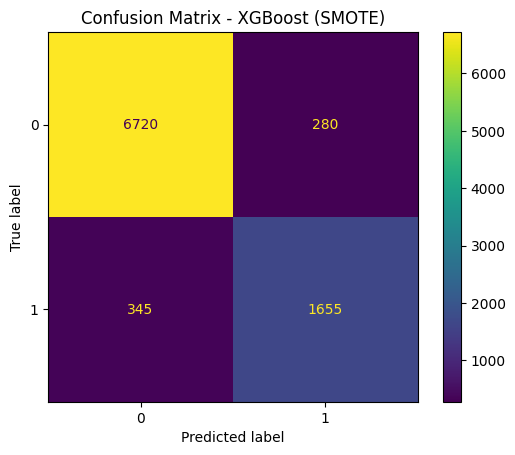

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_sm, X_test, y_test)
plt.title("Confusion Matrix - XGBoost (SMOTE)")
#plt.savefig("Confusion Matrix - XGBoost (SMOTE).png", dpi=300, bbox_inches='tight')
plt.show()

In [126]:
#Save the SMOTE XGB model (best model)
##     joblib.dump(xgb_sm, "xgb_smote.pkl")

# Day 4: Hyperparameter Tuning with GridSearchCV

In [89]:
#  Import Required Tools
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [90]:
# Define Parameter Grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define Parameter Grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

In [91]:
#  Run GridSearchCV (Random Forest)
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
# Run GridSearchCV (XGBoost)
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)
print("Best XGB Params:", xgb_grid.best_params_)

In [127]:
# Evaluate Best RF Model
best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test)

evaluate(y_test, rf_preds, "Tuned Random Forest")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
# Evaluate Best XGB Model
best_xgb = xgb_grid.best_estimator_
xgb_preds = best_xgb.predict(X_test)

evaluate(y_test, xgb_preds, "Tuned XGBoost")

In [ ]:
#  Save the Tuned XGB model (best model)
#joblib.dump(xgb_sm, "xgb_Tuned.pkl")

 # Day 5: SHAP + Feature Importance for Classification

/tmp/ipython-input-96-1311600897.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_feats, palette="viridis")


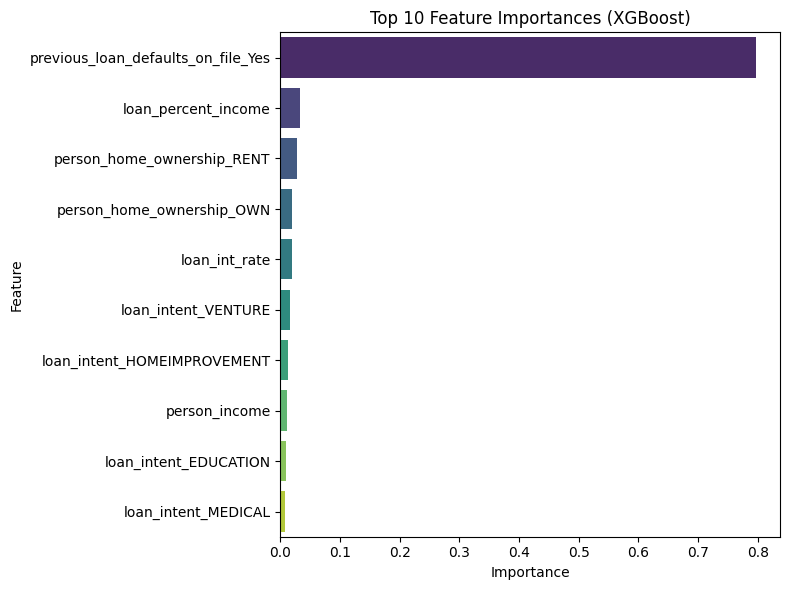

In [96]:
# Native Feature Importance (Random Forest / XGBoost)
importances = best_xgb.feature_importances_           # For best_xgb from GridSearchCV
features = x.columns

# Create a DataFrame for sorting
feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances })

# Sort and get top 10
top_feats = feat_df.sort_values(by="Importance", ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=top_feats, palette="viridis")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
#plt.savefig("Top 10 Feature Importances (XGBoost).png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# shap
import shap
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

In [ ]:
shap.plots.backend = "matplotlib"   # Use matplotlib backend for plots

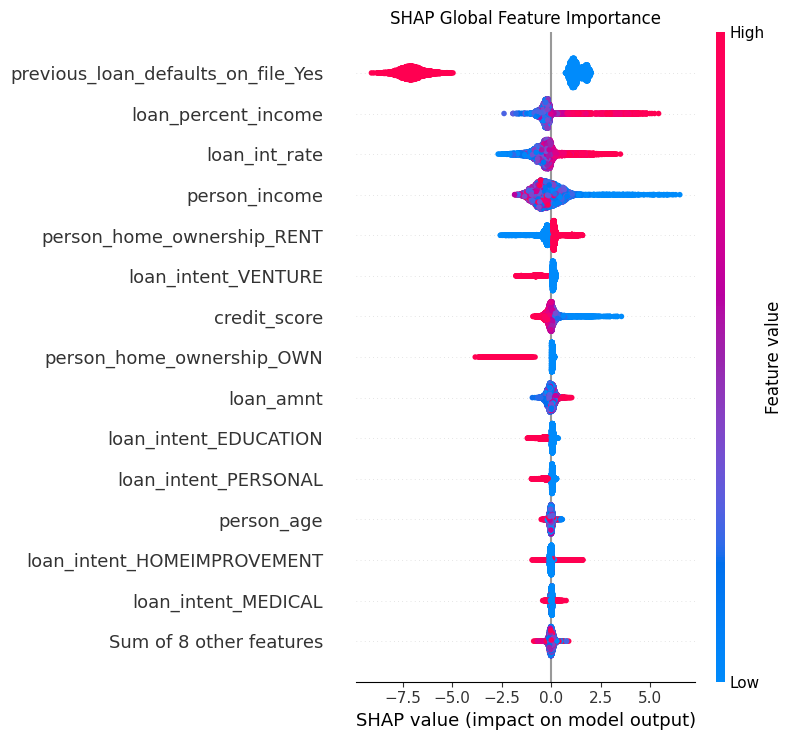

In [93]:
shap.plots.beeswarm(shap_values, max_display=15,show=False) # Global importance
plt.title("SHAP Global Feature Importance")
plt.tight_layout()
#plt.savefig("shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')
plt.show()

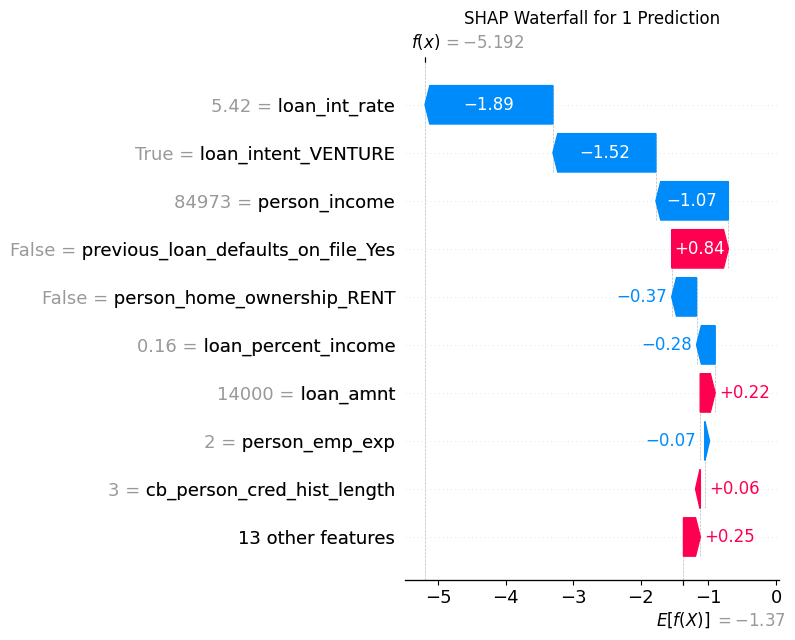

In [94]:
shap.plots.waterfall(shap_values[0], show=False)  # Single prediction breakdown
plt.title("SHAP Waterfall for 1 Prediction")
plt.tight_layout()
#plt.savefig("shap_waterfall_plot.png", dpi=300, bbox_inches='tight')
plt.show()

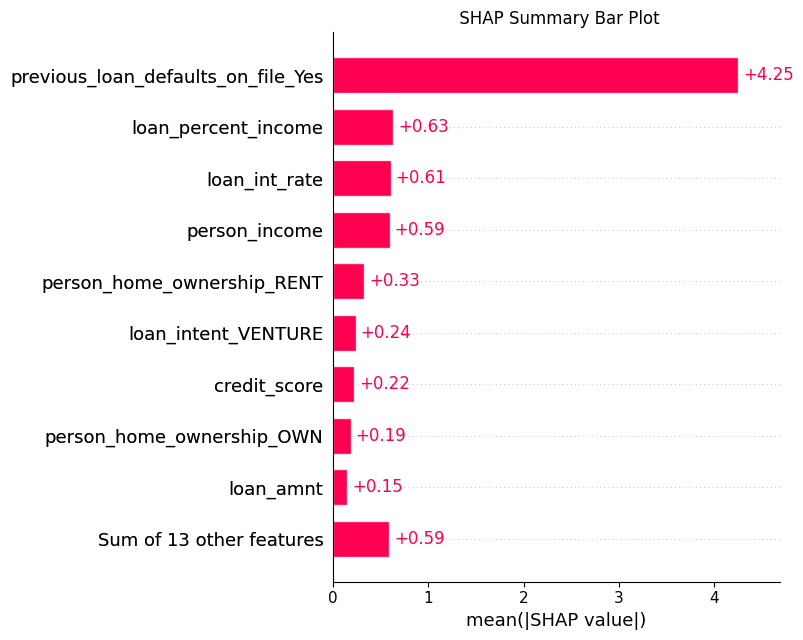

In [97]:
#  SHAP Summary Bar Plot
shap.plots.bar(shap_values,show=False)   #  average importance of each feature across all predictions.
plt.title(" SHAP Summary Bar Plot")
plt.tight_layout()
#plt.savefig("SHAP_Summary_Bar_Plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Day 6: Finalization

# Loan Approval Prediction - ML Classifier

Predict loan approval status using RandomForest and XGBoost.  
Includes full pipeline + SHAP explainability.

## 📌 Dataset
Kaggle: [Loan Approval Classification Data](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data)

## 🧪 Models Used
- Random Forest
- XGBoost (tuned with GridSearchCV)

## 🔍 Explainability
- SHAP Beeswarm: Top influencing features
- SHAP Waterfall: Individual predictions

## 🧼 Workflow
1. Cleaned and encoded data
2. Handled class imbalance (SMOTE & class weights)
3. Tuned models using GridSearchCV
4. Saved model with `joblib`
5. Pushed to GitHub

## 📊 Results
### 🔍 Tuned XGBoost Evaluation

| Metric     | Score |
|------------|-------|
| Accuracy   | 0.94  |
| Precision  | 0.89  |
| Recall     | 0.81  |
| F1-Score   | 0.85  |

#### 📊 Confusion Matrix

|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **Actual: 0**  | 6810         | 190          |
| **Actual: 1**  | 387          | 1613         |





## 🔮 Future Improvements
- Build a Streamlit web app for real-time predictions
- Add ROC-AUC and precision-recall evaluation
- Track data drift using evidently
- Try Optuna for advanced hyperparameter tuning
- Engineer new features from income, loan ratios
- Build a model card to describe ethical usage


## Author
Hemant K  
📧 hemant777.karpe@gmail.com
🔗 [LinkedIn](https://www.linkedin.com/in/hemant-karpe)